In [0]:
#!pip install tqdm -U

In [57]:
from tensorflow.python.client import device_lib
str(device_lib.list_local_devices()[-1]).split('\n')[-2]

'physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"'

In [0]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

import warnings
warnings.filterwarnings('ignore')

# Домашняя работа 
### Урок 5. Сверточные нейронные сети

In [59]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)

2.2.0-rc3


In [0]:
SEED = 1 
os.environ['PYTHONHASHSEED']=str(SEED)
os.environ['TF_CUDNN_DETERMINISTIC'] = '1' 
np.random.seed(SEED)
tf.compat.v1.set_random_seed(SEED)

### Dataset loading and preprocessing

In [0]:
from keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [0]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

In [63]:
print('',f'X_train shape: {X_train.shape}.',
         f'X_test shape: {X_test.shape}.',
         f'y_train shape: {y_train.shape}.',
         f'X_train shape: {y_test.shape}.',sep='\n')


X_train shape: (50000, 32, 32, 3).
X_test shape: (10000, 32, 32, 3).
y_train shape: (50000, 1).
X_train shape: (10000, 1).


In [0]:
X_train = X_train.astype('float32')/ 255.0

X_test = X_test.astype('float32')/ 255.0

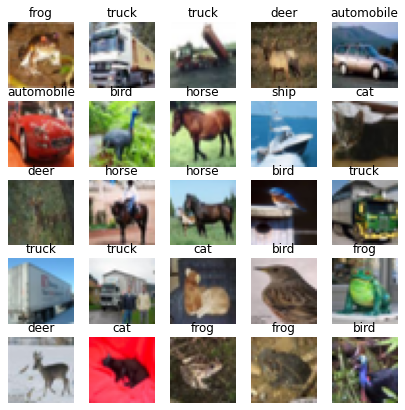

In [65]:
plt.figure(figsize=(7,7))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.axis('off')
    plt.imshow(X_train[i])
    plt.title(class_names[int(y_train[i])])
plt.show()

In [0]:
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

### Model ensemble

In [0]:
import sys
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.layers import Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import BatchNormalization
from keras.utils import to_categorical

In [0]:
def summarize_diagnostics(history):
    plt.subplot(211)
    plt.title('Cross Entropy Loss')
    plt.plot(history.history['loss'], color='blue', label='train')
    plt.plot(history.history['val_loss'], color='orange', label='test')
    plt.subplot(212)
    plt.title('Classification Accuracy')
    plt.plot(history.history['accuracy'], color='blue', label='train')
    plt.plot(history.history['val_accuracy'], color='orange', label='test')
    plt.tight_layout() 

In [0]:
def run_test(epoch=10):
    model = define_model()
    history = model.fit(X_train, y_train,
                        epochs=epoch,
                        batch_size=64,
                        validation_data=(X_test, y_test),
                        verbose=0)
    _, acc = model.evaluate(X_test, y_test, verbose=0)
    print(f'Accuracy on test: {np.round(acc*100,3)} %')
    summarize_diagnostics(history)

# Baseline: 1 VGG Block

Accuracy on test: 66.2 %


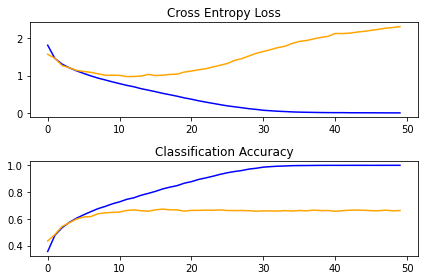

In [70]:
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(10,activation='softmax'))
	opt = SGD(lr=0.001,momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

run_test(50)

# Baseline: 2 VGG Blocks

Accuracy on test: 71.54 %


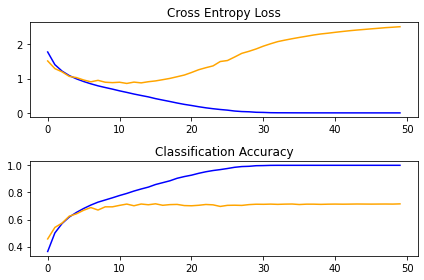

In [71]:
def define_model():
    model = Sequential()

    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))

    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))

    opt = SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model


run_test(50)


# Baseline: 3 VGG Blocks

Accuracy on test: 72.79 %


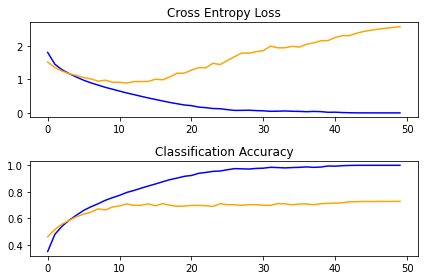

In [72]:
def define_model():
	model = Sequential()
 
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
 
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
 
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
 
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(10, activation='softmax'))
	
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

run_test(50)

# Baseline: 4 VGG Blocks

Accuracy on test: 72.46 %


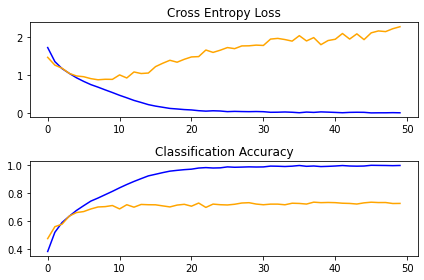

In [73]:
def define_model():
    model = Sequential()

    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))

    model.add(Flatten())
    model.add(Dense(256, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))

    opt = SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model


run_test(50)


# 3 VGG Blocks + Dropout Regularization

Accuracy on test: 80.69 %


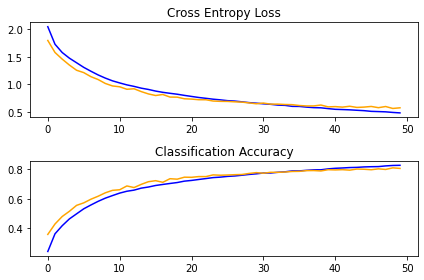

In [74]:

def define_model():
    model = Sequential()

    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))

    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))

    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))

    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dropout(0.2))
    model.add(Dense(10, activation='softmax'))

    opt = SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model


run_test(50)


# 3 VGG Block + Data Augmentation + Dropout Regularization

Accuracy on test: 79.1 %


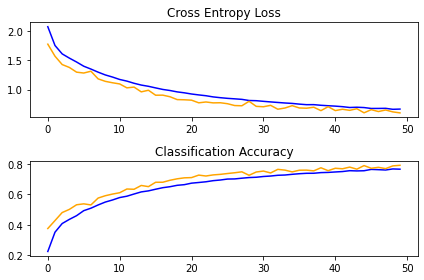

In [75]:
def aug_run_test(epoch=10):
    model = define_model()

    datagen = ImageDataGenerator(width_shift_range=0.1,
                                 height_shift_range=0.1,
                                 horizontal_flip=True)
    
    aug_train = datagen.flow(X_train, y_train, batch_size=64)
    steps = int(X_train.shape[0] / 64)
    history = model.fit_generator(aug_train,
                                  steps_per_epoch=int(X_train.shape[0] / 64),
                                  epochs=epoch,
                                  validation_data=(X_test, y_test),
                                  verbose=0)


    _, acc = model.evaluate(X_test, y_test, verbose=0)
    print(f'Accuracy on test: {np.round(acc * 100, 3)} %')
    summarize_diagnostics(history)

aug_run_test(50)


# 3 VGG Block + Data Augmentation + Dropout Regularization + Batch Normal


In [0]:
# define cnn model
def define_model():
	model = Sequential()
 
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
	model.add(BatchNormalization())
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
 
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.3))
 
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.4))
 
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(BatchNormalization())
	model.add(Dropout(0.5))
	model.add(Dense(10, activation='softmax'))

	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

Accuracy on test: 75.2 %


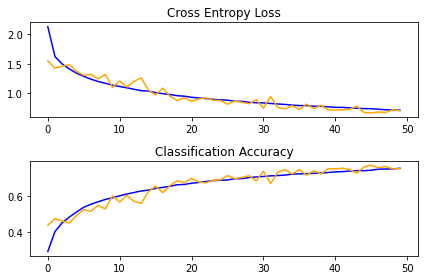

In [77]:
aug_run_test(50)

# Alexnet + augmented train

Accuracy on test: 80.41 %


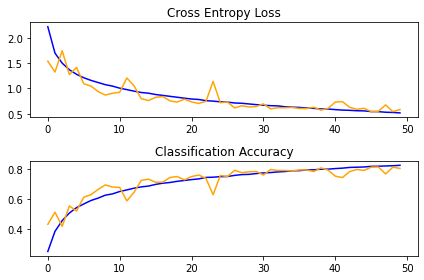

In [78]:
def define_model():
    model = Sequential()

    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='SAME', input_shape=(32, 32, 3)))
    model.add(MaxPooling2D(pool_size =2))
    model.add(BatchNormalization())

    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='SAME'))
    model.add(MaxPooling2D(pool_size =2))
    model.add(BatchNormalization())

    model.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='SAME'))
    model.add(MaxPooling2D(pool_size =2))
    model.add(BatchNormalization())

    model.add(Conv2D(512, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='SAME'))
    model.add(MaxPooling2D(pool_size =2))
    model.add(BatchNormalization())


    model.add(Flatten())

    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())

    model.add(Dense(256, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dropout(0.3))
    model.add(BatchNormalization())

    model.add(Dense(512, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dropout(0.4))
    model.add(BatchNormalization())

    model.add(Dense(1024, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dropout(0.5))
    model.add(BatchNormalization())

    model.add(Dense(10, activation='softmax'))

    opt = SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model


aug_run_test(50)